In [1]:
from pcgym.pcgym import make_env
import numpy as np
import random
from stable_baselines3 import SAC

# Control Club Challenge (PSE) 
## 1. Control Problem

The environment used in the this problem is a Continuously Stirred Tank Reactor (CSTR) performing an exothermic reaction (A → B). The controlled variable with be the concentration of species A by manipulating the temperature of the cooling jacket. A diagram of the environment is given below.

<div style="text-align:center">
  <img src="..\docs\img\CSTR_PFD.png" alt="CSTR" width="400">
</div>

### Problem Definition

Define SP, reps, disturbance and reward...



## 2. Example Policy and Rollout

First define the environment

In [6]:
T = 26
nsteps = 120
SP = {
    'Ca': [0.85 for i in range(int(nsteps/4))] + [0.9 for i in range(int(3*nsteps/4))],
}

disturbance = {'Caf': np.repeat([1, 1.05, 1], [nsteps//3, nsteps//3, nsteps//3])}

#Continuous box action space
action_space = {
    'low': np.array([295]),
    'high':np.array([302]) 
}
#Continuous box observation space
observation_space = {
    'low' : np.array([0.7,300,0.8]),
    'high' : np.array([1,350,0.9])  
}
disturbance_space ={
  'low': np.array([1]),
  'high': np.array([1.05])
}
env_params = {
    'N': nsteps, # Number of time steps
    'tsim':T, # Simulation Time
    'SP':SP, #Setpoint
    'o_space' : observation_space, #Observation space
    'a_space' : action_space, # Action space
    'x0': np.array([0.8,330,0.8]), # Initial conditions (torch.tensor)
    'model': 'cstr_ode', #Select the model
    'normalise_a': True, #Normalise the actions
    'normalise_o':True, #Normalise the states,
    'noise':True, #Add noise to the states
    'integration_method': 'casadi', #Select the integration method
    'noise_percentage':0.001, #Noise percentage
    'disturbance_bounds':disturbance_space,
    'disturbances': disturbance
}
env = make_env(env_params)

Example Policy

In [10]:
class policy:
    def predict(self,deterministic = False):
        return random.uniform(-1, 1), 0


In [9]:
model = SAC('MlpPolicy', env, verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [8]:
model.learn(total_timesteps=1e4)

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -0.0901  |
| time/              |          |
|    episodes        | 4        |
|    fps             | 87       |
|    time_elapsed    | 5        |
|    total_timesteps | 480      |
| train/             |          |
|    actor_loss      | -2.24    |
|    critic_loss     | 0.0346   |
|    ent_coef        | 0.893    |
|    ent_coef_loss   | -0.191   |
|    learning_rate   | 0.0003   |
|    n_updates       | 379      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 120      |
|    ep_rew_mean     | -0.0888  |
| time/              |          |
|    episodes        | 8        |
|    fps             | 78       |
|    time_elapsed    | 12       |
|    total_timesteps | 960      |
| train/             |          |
|    actor_loss      | -3.24    |
|    critic_loss     | 0.0339   |
|    ent_coef 

Rollout random policy


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************



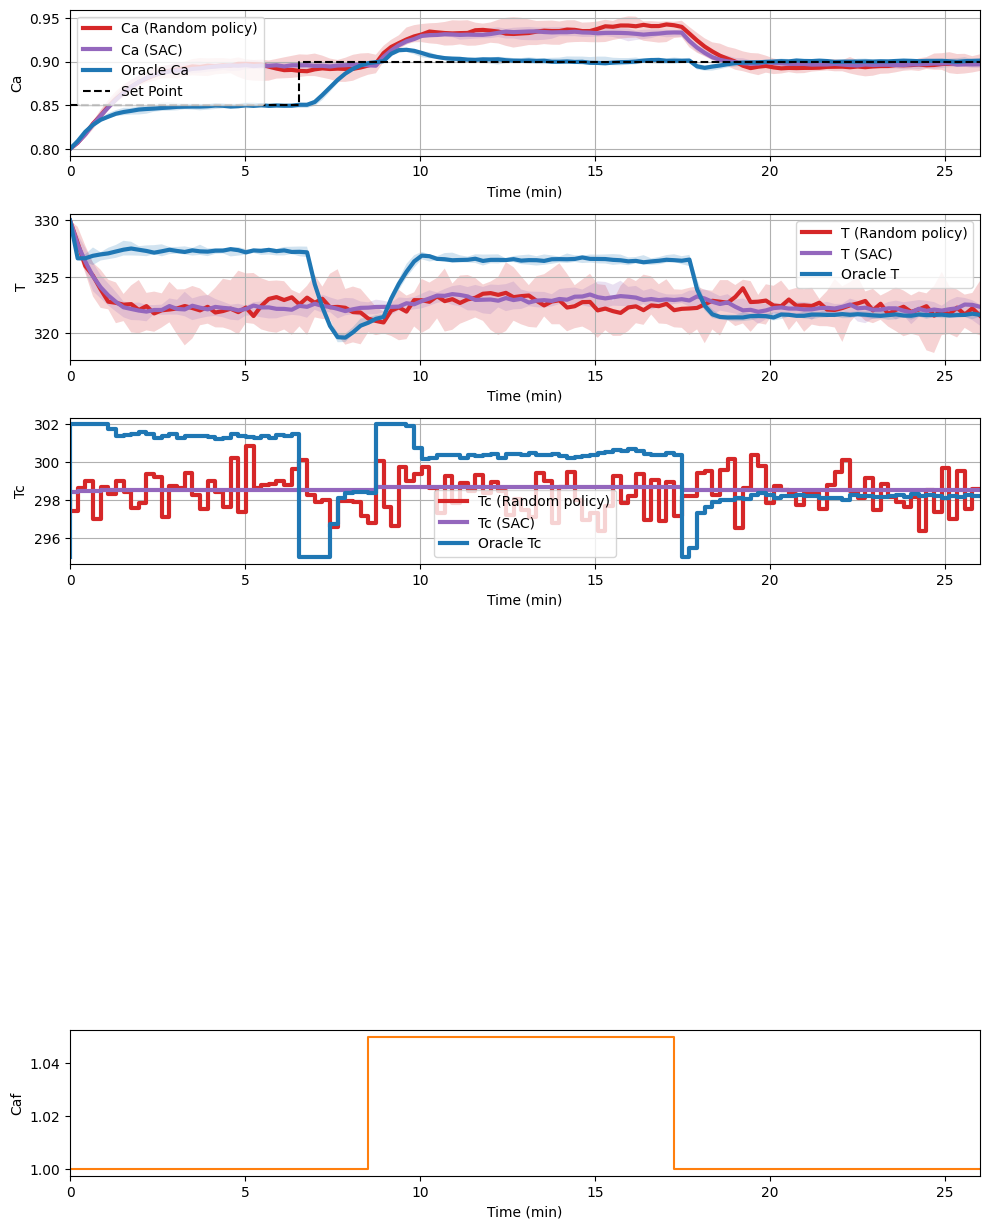

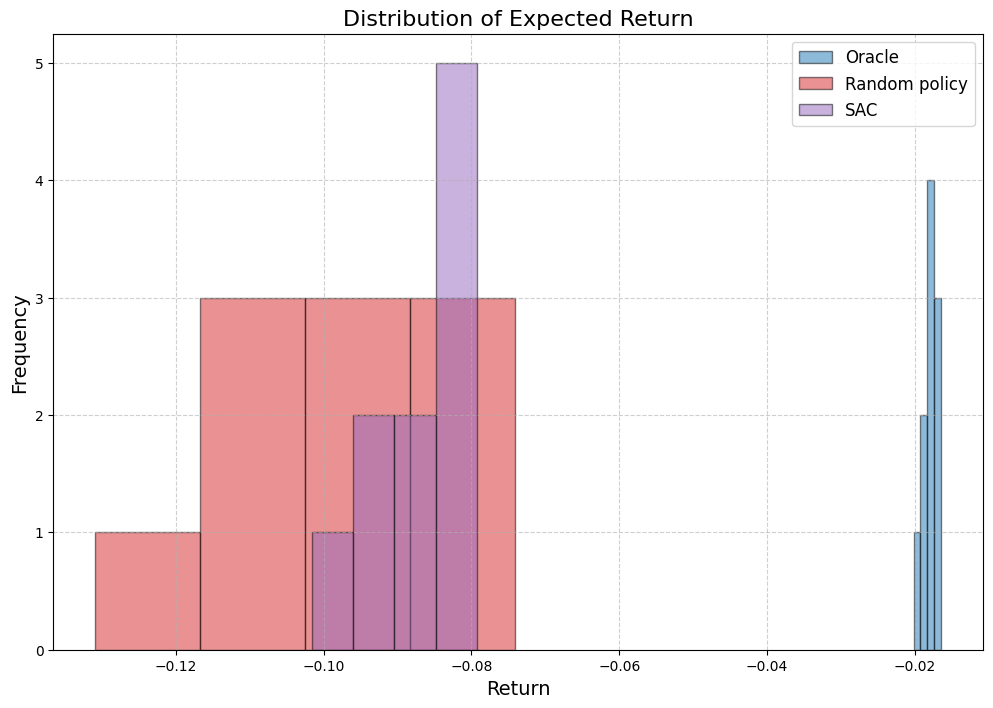

(<pcgym.Policy_Evaluation.policy_eval at 0x1d5f50db950>,
 {'oracle': {'r': array([[-0.01709154, -0.01696199, -0.01769601, -0.0181386 , -0.01648251,
           -0.01799279, -0.01798958, -0.01884295, -0.01844782, -0.02016049]]),
   'x': array([[[  0.8       ,   0.8       ,   0.8       , ...,   0.8       ,
              0.8       ,   0.8       ],
           [  0.80970453,   0.8075618 ,   0.80842783, ...,   0.80811241,
              0.80925571,   0.80963861],
           [  0.82086087,   0.817385  ,   0.81979095, ...,   0.82042246,
              0.81910884,   0.81949844],
           ...,
           [  0.90292726,   0.90178602,   0.89825837, ...,   0.89873919,
              0.9003776 ,   0.89999807],
           [  0.90082087,   0.90249163,   0.8999743 , ...,   0.89928498,
              0.89886054,   0.9013926 ],
           [  0.90093764,   0.90058133,   0.90137238, ...,   0.90052856,
              0.89774656,   0.90116657]],
   
          [[330.        , 330.        , 330.        , ..., 330.

In [11]:
env.plot_rollout({'Random policy':policy,'SAC':model},10,oracle = True,dist_reward=True,MPC_params={'N':10,'R':0.001})

## 3. Your Implementation!
Some helpful resourses:
  - [Stable Baselines](https://stable-baselines3.readthedocs.io/en/master/) - Off the shelf implementations of common RL algorithms
 -  [Minimal RL ](https://github.com/seungeunrho/minimalRL) - Minimal versions of common RL algorithms (useful for understanding how to translate the algorithms into code)
 -  [Spinning Up in DRL](https://spinningup.openai.com/en/latest/index.html) - More implememtations from OpenAI
 - [pc-gym documentation](https://maximilianb2.github.io/pc-gym/)